In [2]:
!pip install Prophet

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
from google.colab import files
uploaded = files.upload()

act_blizzard_df  = pd.read_csv(
    "act_act_blizzard.csv")

display(act_blizzard_df.head())
display(act_blizzard_df.tail())

Saving act_act_blizzard.csv to act_act_blizzard.csv


,Date,TICKER,Open,High,Low,Close,Volume,Currency
0,2010-01-04,ATVI,11.23,11.45,11.15,11.30,9310055,USD
1,2010-01-05,ATVI,11.24,11.36,11.21,11.32,11370203,USD
2,2010-01-06,ATVI,11.26,11.38,11.21,11.26,6541811,USD
3,2010-01-07,ATVI,11.10,11.19,10.93,10.99,15392067,USD
4,2010-01-08,ATVI,10.97,11.05,10.88,10.90,11003838,USD


,Date,TICKER,Open,High,Low,Close,Volume,Currency
3186,2022-08-29,ATVI,78.55,79.08,78.50,78.75,3657033,USD
3187,2022-08-30,ATVI,78.83,78.94,78.47,78.62,3075012,USD
3188,2022-08-31,ATVI,79.06,79.07,78.49,78.49,4108374,USD
3189,2022-09-01,ATVI,78.36,79.00,78.10,78.55,4818317,USD
3190,2022-09-02,ATVI,78.50,78.52,77.37,77.53,4315554,USD


In [5]:
prophet_df = act_blizzard_df[['Date', 'Close']]
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

model = Prophet()
model.fit(prophet_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2r1gy7jx/bx4a_1rx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2r1gy7jx/nrepb6fs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72524', 'data', 'file=/tmp/tmp2r1gy7jx/bx4a_1rx.json', 'init=/tmp/tmp2r1gy7jx/nrepb6fs.json', 'output', 'file=/tmp/tmp2r1gy7jx/prophet_modelus3fy4bz/prophet_model-20230721030906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:09:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:09:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
future_dates = model.make_future_dataframe(periods= 2000, freq='D')

In [7]:
forecast = model.predict(future_dates)

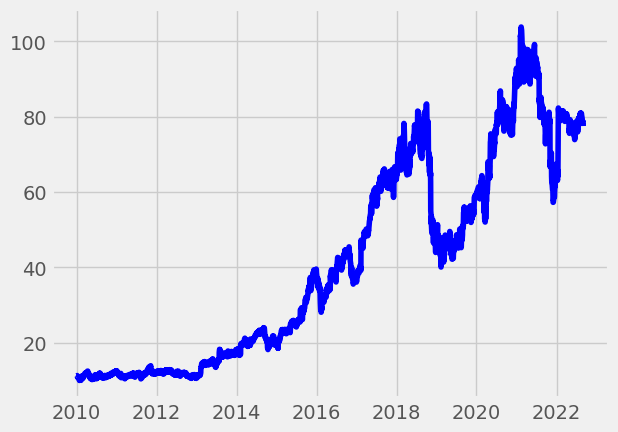

In [8]:
plt.plot(prophet_df['ds'], prophet_df['y'], color='blue', label='Actual')


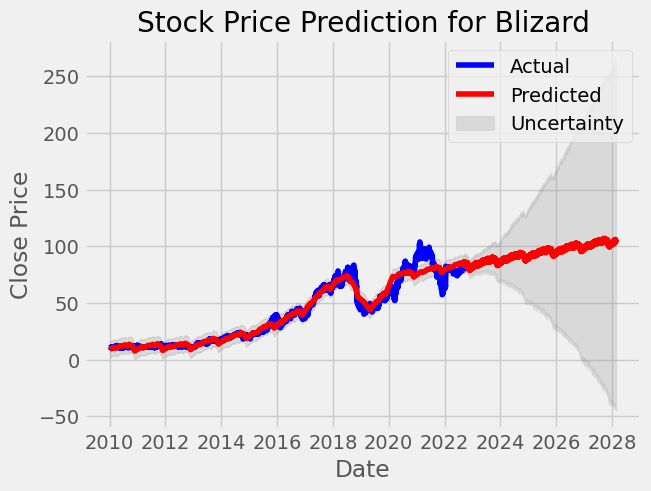

In [9]:

plt.plot(prophet_df['ds'], prophet_df['y'], color='blue', label='Actual')


plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Predicted')


plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction for Blizard')
plt.legend()
plt.show()